# AG2 - Actividad Guiada 2

**Nombre**: Marc González Pastor <br>
**Link**:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
**Github**: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>

In [1]:
import itertools
import random
import re
import time
from typing import List, Optional, Sequence, Set, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from sympy.plotting import plot3d

INF = float("inf")

## Programación Dinámica. Viaje por el río

- **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
- **Características** que permiten identificar problemas aplicables:<br>
  - Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  - Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  - La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

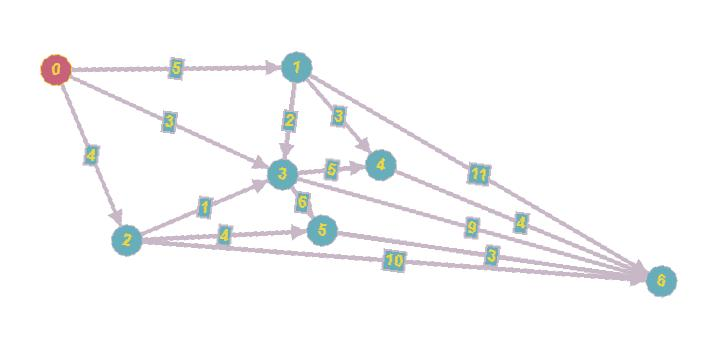

- Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
- Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
tarifas = [
    [0, 5, 4, 3, INF, INF, INF],        # desde nodo 0
    [INF, 0, INF, 2, 3, INF, 11],       # desde nodo 1
    [INF, INF, 0, 1, INF, 4, 10],       # desde nodo 2
    [INF, INF, INF, 0, 5, 6, 9],
    [INF, INF, INF, INF, 0, INF, 4],
    [INF, INF, INF, INF, INF, 0, 3],
    [INF, INF, INF, INF, INF, INF, 0]
]

In [3]:
def calcular_precios_ruta(tarifas: List[List[float]]) -> Tuple[List[List[float]], List[List[Optional[int]]]]:
    """Calcula las matrices de precios mínimos y nodos para reconstruir rutas.

    precios[i][j] almacena el coste mínimo para ir del nodo i al nodo j (solo para i < j).
    ruta[i][j] almacena el nodo k que permite obtener ese coste mínimo en el último tramo k -> j.
    Si la mejor opción es ir directamente de i a j, entonces ruta[i][j] = i.

    Nota: este algoritmo rellena únicamente la parte superior de las matrices (i < j), asumiendo
    que el recorrido avanza hacia adelante (no hay ciclos ni retrocesos).

    Args:
        tarifas: Matriz cuadrada con los costes directos. Si no hay un camino directo, se debe usar
            un valor alto (ej. float('inf')).

    Returns:
        Una tupla (precios, ruta) donde:
        - precios: Matriz con los costes mínimos para ir de i a j.
        - ruta: Matriz para reconstruir la ruta óptima. Las posiciones no calculadas (i >= j) se dejan como None.
    """
    # Total de nodos
    n = len(tarifas)        # Al ser una matriz cuadrada, len(tarifas) == len(tarifas[0])

    # Inicialización de las matrices de precios y rutas
    precios: List[List[float]] = [[INF] * n for _ in range(n)]
    ruta: List[List[Optional[int]]] = [[None] * n for _ in range(n)]
    for i in range(n):
        precios[i][i] = 0.0
        ruta[i][i] = i

    # Construcción de precios y ruta para cada par (origen, destino)
    for i in range(n - 1):              # Origen
        for j in range(i + 1, n):       # Destino
            minimo = tarifas[i][j]
            ruta[i][j] = i              # Inicialmente, asumimos que la mejor ruta es la directa

            for k in range(i + 1, j):   # Nodo intermedio
                candidato = precios[i][k] + tarifas[k][j]
                if candidato < minimo:
                    minimo = candidato
                    ruta[i][j] = k      # Actualizamos el nodo intermedio

            precios[i][j] = minimo      # Guardamos el coste mínimo encontrado

    return precios, ruta

In [5]:
def calcular_ruta(ruta: List[List[Optional[int]]], origen: int, destino: int) -> str:
    """Reconstruye la ruta óptima a partir de la matriz `ruta`.

    La matriz `ruta` se interpreta así:
      - ruta[i][j] = i si el mejor camino es directo i -> j.
      - ruta[i][j] = k (con i < k < j) si el mejor camino termina con k -> j
      y el tramo i -> k debe reconstruirse recursivamente.

    Args:
        ruta: Matriz devuelta por `calcular_precios_ruta`.
        origen: Nodo de inicio.
        destino: Nodo de destino.

    Returns:
        Ruta completa como cadena con nodos separados por comas (p. ej. "0,2,4,6").
    """
    k = ruta[origen][destino]
    if k is None:
        raise ValueError(f"No hay información de ruta para ({origen}, {destino}).")

    if k == origen:
        return f"{origen},{destino}"

    return f"{calcular_ruta(ruta, origen, k)},{destino}"

In [6]:
precios, ruta = calcular_precios_ruta(tarifas)

print("Coste mínimo 0→6:", precios[0][6])
print("Ruta 0→6:", calcular_ruta(ruta, 0, 6))

print("\nPRECIOS")
for fila in precios:
    print(fila)

print("\nRUTA")
for fila in ruta:
    print(fila)

Coste mínimo 0→6: 11
Ruta 0→6: 0,2,5,6

PRECIOS
[0.0, 5, 4, 3, 8, 8, 11]
[inf, 0.0, inf, 2, 3, 8, 7]
[inf, inf, 0.0, 1, 6, 4, 7]
[inf, inf, inf, 0.0, 5, 6, 9]
[inf, inf, inf, inf, 0.0, inf, 4]
[inf, inf, inf, inf, inf, 0.0, 3]
[inf, inf, inf, inf, inf, inf, 0.0]

RUTA
[0, 0, 0, 0, 1, 2, 5]
[None, 1, 1, 1, 1, 3, 4]
[None, None, 2, 2, 3, 2, 5]
[None, None, None, 3, 3, 3, 3]
[None, None, None, None, 4, 4, 4]
[None, None, None, None, None, 5, 5]
[None, None, None, None, None, None, 6]


## Problema de Asignacion de tarea

In [ ]:
# Asignación de tareas — Ramificación y Poda
# costes[i][j]: coste de asignar un elemento al otro.
# La tupla solución S se interpreta como: S[i] = asignación elegida para el índice i (agente i asignado a la tarea S[i]).

costes = [
    [11, 12, 18, 40],
    [14, 15, 13, 22],
    [11, 17, 19, 23],
    [17, 14, 20, 28],
]

solucion = (1, 3)

In [16]:
costes = [
    [9, 2, 7, 8],
    [6, 4, 3, 7],
    [5, 8, 1, 8],
    [7, 6, 9, 4]
]

objetivo = "min"

In [17]:
def coste_acumulado(solucion: Sequence[int], costes: List[List[float]]) -> float:
    """Calcula el coste acumulado de una solución (parcial o completa).

    Convención:
        solucion[i] = tarea asignada al agente i
        costes[i][j] = coste de asignar al agente i la tarea j

    Args:
        solucion: Asignación parcial o completa.
        costes: Matriz cuadrada de costes (n x n).

    Returns:
        Coste total acumulado para las asignaciones ya decididas.
    """
    return sum(costes[agente][tarea] for agente, tarea in enumerate(solucion))


def tareas_asignadas(solucion: Sequence[int]) -> Set[int]:
    """Devuelve el conjunto de tareas ya asignadas en la solución parcial.

    Args:
        solucion: Asignación parcial (tupla de tareas asignadas a agentes 0, ..., n-1).

    Returns:
        Conjunto de índices de tareas que ya han sido asignadas.
    """
    return set(solucion)


def tareas_disponibles(solucion: Sequence[int], n: int) -> Set[int]:
    """Devuelve el conjunto de tareas que aún no han sido asignadas.

    Args:
        solucion: Asignación parcial.
        n: Número total de tareas/agentes (tamaño del problema).

    Returns:
        Conjunto de índices de tareas disponibles para asignar.
    """
    asignadas = tareas_asignadas(solucion)
    return set(range(n)) - asignadas


def cota_inferior(solucion: Sequence[int], costes: List[List[float]]) -> float:
    """Calcula una cota inferior (optimista) del coste total para una solución parcial.

    Parte 1 (coste ya fijado):
        Suma los costes de las asignaciones ya decididas.

    Parte 2 (estimación optimista para completar):
        Para cada tarea j aún no asignada (tareas_disponibles),
        añade el mínimo (o máximo) coste posible en esa columna considerando
        solo los agentes restantes (i desde len(solucion) hasta n).

    Args:
        solucion: Asignación parcial (longitud m). `solucion[i]` es el índice asignado en i.
        costes: Matriz cuadrada de costes (n x n).

    Returns:
        Un valor que actúa como cota inferior del coste de cualquier completación.
    """
    m = len(solucion)
    n = len(costes)

    # Coste de las asignaciones ya establecidas
    total = coste_acumulado(solucion, costes)

    # Estimación optimista para las columnas restantes
    for j in tareas_disponibles(solucion, n):
        total += min(costes[i][j] for i in range(m, n))

    return total


def cota_superior(solucion: Sequence[int], costes: List[List[float]]) -> float:
    """Calcula una cota superior (pesimista) del coste total para una solución parcial.

    Misma idea que `cota_inferior`, pero usando máximos en la estimación.

    Args:
        solucion: Asignación parcial.
        costes: Matriz cuadrada de costes (n x n).

    Returns:
        Un valor que actúa como cota superior.
    """
    m = len(solucion)
    n = len(costes)

    # Coste de las asignaciones ya establecidas
    total = coste_acumulado(solucion, costes)

    for j in tareas_disponibles(solucion, n):
        total += max(costes[i][j] for i in range(m, n))

    return total


def crear_hijos(solucion: Tuple[int, ...], n: int) -> List[Tuple[int, ...]]:
    """Amplía la solución con el resto de posibilidades.

    Dado un conjunto de nodos (tupla de asignaciones ya decididas), se añaden las posibles asignaciones para el siguiente agente (índice len(nodo)).

    Args:
        solucion: Solución parcial actual (tupla de asignaciones).
        n: Número total de tareas/agentes.

    Returns:
        Lista de nodos hijos (tuplas), cada uno con una nueva asignación añadida.
    """

    hijos = []
    for tarea in sorted(tareas_disponibles(solucion, n)):
        hijos.append(solucion + (tarea,))

    return hijos

In [19]:
def ramificacion_y_poda(costes, objetivo="min"):
    """Resuelve el problema de asignación mediante Ramificación y Poda (Branch & Bound).

    Convención:
        - La solución se representa como una tupla `s` donde `s[i]` es la tarea asignada al agente i.
        - La matriz `costes` se interpreta como `costes[agente][tarea]`.

    Estrategia:
        - Se mantiene una lista de nodos pendientes, donde cada nodo es un diccionario:
            {"s": solucion_parcial, "cota": cota_asociada}
        - En cada iteración se selecciona el nodo más prometedor:
            * Minimización: el de menor cota (cota inferior).
            * Maximización: el de mayor cota (cota superior).
        - Se ramifica generando hijos (añadiendo una tarea al siguiente agente).
        - Si aparece una solución completa, se actualiza la mejor solución conocida.
        - Se poda descartando nodos cuya cota ya no permite mejorar la mejor solución actual.

    Args:
        costes: Matriz cuadrada de costes (n x n).
        objetivo: "min" para minimizar el coste total, "max" para maximizarlo.

    Returns:
        Una tupla (mejor_solucion, mejor_valor, iteracion) donde:
        - mejor_solucion: tupla con la asignación óptima encontrada.
        - mejor_valor: coste total asociado a `mejor_solucion` (según el objetivo).
        - iteracion: número de iteraciones del bucle principal (nodos extraídos/expandido).
    """
    dimension = len(costes)

    # Solución inicial factible (incumbente)
    mejor_solucion = tuple(range(dimension))
    mejor_valor = coste_acumulado(mejor_solucion, costes)

    if objetivo == "max":
        cota = cota_superior
        seleccionar = max
        mejora = lambda v: v > mejor_valor
        no_puede_mejorar = lambda c: c <= mejor_valor
        filtrar_pendientes = lambda nodos: [x for x in nodos if x["cota"] > mejor_valor]
    else:
        cota = cota_inferior
        seleccionar = min
        mejora = lambda v: v < mejor_valor
        no_puede_mejorar = lambda c: c >= mejor_valor
        filtrar_pendientes = lambda nodos: [x for x in nodos if x["cota"] < mejor_valor]

    nodos = [{"s": (), "cota": cota((), costes)}]
    iteracion = 0

    while nodos:
        iteracion += 1

        nodo_prometedor = seleccionar(nodos, key=lambda x: x["cota"])

        # Si el mejor nodo pendiente ya no puede mejorar, terminamos
        if no_puede_mejorar(nodo_prometedor["cota"]):
            break

        solucion_parcial = nodo_prometedor["s"]

        # Eliminamos el nodo expandido
        nodos = [x for x in nodos if x["s"] != solucion_parcial]

        # Ramificación
        for hijo in crear_hijos(solucion_parcial, dimension):
            cota_hijo = cota(hijo, costes)

            # Poda por cota
            if no_puede_mejorar(cota_hijo):
                continue

            # Si es solución completa, evaluamos y actualizamos incumbente
            if len(hijo) == dimension:
                valor_hijo = coste_acumulado(hijo, costes)
                if mejora(valor_hijo):
                    mejor_valor = valor_hijo
                    mejor_solucion = hijo
                    # Limpieza inmediata de pendientes (evita iteraciones inútiles)
                    nodos = filtrar_pendientes(nodos)
                continue

            # Si no es completa, la guardamos
            nodos.append({"s": hijo, "cota": cota_hijo})

    return mejor_solucion, mejor_valor, iteracion

In [32]:
t0_bb = time.perf_counter()
sol_bb, val_bb, iter_bb = ramificacion_y_poda(costes, objetivo=objetivo)
t1_bb = time.perf_counter()
print(
    "Resultado (Ramificación y Poda)\n"
    f"- Objetivo     : {'minimizar' if objetivo == 'min' else 'maximizar'}\n"
    f"- Dimensión    : {len(costes)}\n"
    f"- Solución     : {sol_bb}\n"
    f"- Valor total  : {val_bb}\n"
    f"- Iteraciones  : {iter_bb}\n"
    f"- Tiempo (s)   : {t1_bb - t0_bb:.4f}"
)

Resultado (Ramificación y Poda)
- Objetivo     : minimizar
- Dimensión    : 4
- Solución     : (1, 0, 2, 3)
- Valor total  : 13
- Iteraciones  : 4
- Tiempo (s)   : 0.0001


In [34]:
def fuerza_bruta(costes, objetivo="min"):
    """Resuelve asignación probando todas las permutaciones (búsqueda exhaustiva).

    Convención:
        solucion[i] = tarea asignada al agente i
        costes[i][j] = coste de asignar al agente i la tarea j

    Args:
        costes: Matriz cuadrada (n x n).
        objetivo: "min" para minimizar, "max" para maximizar.

    Returns:
        (mejor_solucion, mejor_valor, evaluaciones)
    """
    n = len(costes)

    mejor_solucion = None
    mejor_valor = -INF if objetivo == "max" else INF
    iteracion = 0

    for perm in itertools.permutations(range(n)):
        iteracion += 1
        valor = coste_acumulado(perm, costes)

        if objetivo == "max":
            if valor > mejor_valor:
                mejor_valor = valor
                mejor_solucion = perm
        else:
            if valor < mejor_valor:
                mejor_valor = valor
                mejor_solucion = perm

    return mejor_solucion, mejor_valor, iteracion

In [35]:
t0_fb = time.perf_counter()
sol_fb, val_fb, iter_fb = fuerza_bruta(costes, objetivo=objetivo)
t1_fb = time.perf_counter()

print(
    "Resultado (Fuerza Bruta)\n"
    f"- Objetivo       : {'minimizar' if objetivo == 'min' else 'maximizar'}\n"
    f"- Dimensión      : {len(costes)}\n"
    f"- Solución       : {sol_fb}\n"
    f"- Valor total    : {val_fb}\n"
    f"- Evaluaciones   : {iter_fb}\n"
    f"- Tiempo (s)     : {t1_fb - t0_fb:.4f}"
)

Resultado (Fuerza Bruta)
- Objetivo       : minimizar
- Dimensión      : 4
- Solución       : (1, 0, 2, 3)
- Valor total    : 13
- Evaluaciones   : 24
- Tiempo (s)     : 0.0001


In [31]:
assert val_bb == val_fb, "B&B no coincide con fuerza bruta"

In [37]:
def generar_matriz_costes(n, low=1, high=100, seed=None):
    """Genera una matriz n x n de costes enteros aleatorios."""
    rng = random.Random(seed)
    return [[rng.randint(low, high) for _ in range(n)] for _ in range(n)]

def ejecutar_ramificacion_y_poda(costes, objetivo="min"):
    """Ejecuta Ramificación y Poda y devuelve métricas."""
    t0_bb = time.perf_counter()
    solucion, valor, iteraciones = ramificacion_y_poda(costes, objetivo=objetivo)
    t1_bb = time.perf_counter()

    return {
        "algoritmo": "ramificacion_y_poda",
        "tiempo_s": t1_bb - t0_bb,
        "pasos": iteraciones,
        "valor": valor,
        "solucion": str(solucion),
    }

def ejecutar_fuerza_bruta(costes, objetivo="min"):
    """Ejecuta Fuerza Bruta y devuelve métricas."""
    t0_fb = time.perf_counter()
    solucion, valor, evaluaciones = fuerza_bruta(costes, objetivo=objetivo)
    t1_fb = time.perf_counter()
    return {
        "algoritmo": "fuerza_bruta",
        "tiempo_s": t1_fb - t0_fb,
        "pasos": evaluaciones,
        "valor": valor,
        "solucion": str(solucion),
    }

def benchmark_asignacion(
    n_min=2,
    n_max=8,
    objetivo="min",
    seed_base=0,
    repeticiones=1,
    low=1,
    high=100,
    csv_path=None,
):
    """Benchmark de asignación (Fuerza Bruta vs. Ramificación y Poda).

    Para cada tamaño n y repetición:
      - genera una matriz aleatoria con una semilla reproducible
      - ejecuta ambos algoritmos sobre la misma matriz
      - devuelve un DataFrame con los resultados

    Si `csv_path` no es None, guarda el DataFrame en CSV.a
    """
    filas = []

    for n in range(n_min, n_max + 1):
        for r in range(repeticiones):
            seed = seed_base + 1000 * n + r
            costes = generar_matriz_costes(n, low=low, high=high, seed=seed)

            out_bb = ejecutar_ramificacion_y_poda(costes, objetivo=objetivo)
            out_fb = ejecutar_fuerza_bruta(costes, objetivo=objetivo)

            if out_bb["valor"] != out_fb["valor"]:
                print(f"AVISO: n={n}, seed={seed}, BB={out_bb['valor']} vs FB={out_fb['valor']}")

            for out in (out_bb, out_fb):
                filas.append({
                    "n": n,
                    "objetivo": objetivo,
                    "seed": seed,
                    "repetición": r,
                    **out,
                })

    df = pd.DataFrame(filas)

    if csv_path is not None:
        df.to_csv(csv_path, index=False, encoding="utf-8")

    return df

In [38]:
df = benchmark_asignacion(
    n_min=5,
    n_max=10,
    objetivo="min",
    seed_base=100,
    repeticiones=3,
    csv_path="benchmark_asignacion.csv",
)

df

,n,objetivo,seed,repeticion,algoritmo,tiempo_s,pasos,valor,solucion
0,5,min,5100,0,ramificacion_y_poda,0.000234,24,144,"(2, 0, 3, 4, 1)"
1,5,min,5100,0,fuerza_bruta,0.000058,120,144,"(2, 0, 3, 4, 1)"
2,5,min,5101,1,ramificacion_y_poda,0.000045,5,133,"(4, 3, 2, 0, 1)"
3,5,min,5101,1,fuerza_bruta,0.000054,120,133,"(4, 3, 2, 0, 1)"
4,5,min,5102,2,ramificacion_y_poda,0.000041,5,52,"(0, 1, 4, 2, 3)"
5,5,min,5102,2,fuerza_bruta,0.000052,120,52,"(0, 1, 4, 2, 3)"
6,6,min,6100,0,ramificacion_y_poda,0.000313,22,110,"(2, 5, 0, 4, 1, 3)"
7,6,min,6100,0,fuerza_bruta,0.000264,720,110,"(2, 5, 0, 4, 1, 3)"
8,6,min,6101,1,ramificacion_y_poda,0.000085,9,173,"(2, 5, 1, 4, 3, 0)"
9,6,min,6101,1,fuerza_bruta,0.000240,720,173,"(2, 5, 1, 4, 3, 0)"


In [39]:
resumen = (
    df.groupby(["n", "algoritmo"], as_index=False)
      .agg(tiempo_mediana_s=("tiempo_s", "median"),
           pasos_mediana=("pasos", "median"),
           valor_mediana=("valor", "median"))
)

resumen

,n,algoritmo,tiempo_mediana_s,pasos_mediana,valor_mediana
0,5,fuerza_bruta,0.000054,120.0,133.0
1,5,ramificacion_y_poda,0.000045,5.0,133.0
2,6,fuerza_bruta,0.000243,720.0,131.0
3,6,ramificacion_y_poda,0.000085,9.0,131.0
4,7,fuerza_bruta,0.002015,5040.0,86.0
5,7,ramificacion_y_poda,0.000101,9.0,86.0
6,8,fuerza_bruta,0.017980,40320.0,113.0
7,8,ramificacion_y_poda,0.000183,14.0,113.0
8,9,fuerza_bruta,0.154993,362880.0,134.0
9,9,ramificacion_y_poda,0.000964,51.0,134.0


Análisis para mejorar nota (Asignación)

1) Complejidad de fuerza bruta
Fuerza bruta evalúa todas las permutaciones posibles de n tareas: n! evaluaciones. Cada evaluación calcula el coste de una asignación en O(n). Por tanto, el coste temporal es O(n·n!) y el coste espacial es O(n) (más el almacenamiento de la mejor solución).

2) Ejecución con dimensiones crecientes
En el benchmark (n=5…10) se observa el crecimiento factorial de fuerza bruta (pasos = n!). Por ejemplo, pasa de 362.880 evaluaciones en n=9 a 3.628.800 en n=10, y el tiempo mediano crece en consecuencia. En cambio, Ramificación y Poda visita muchos menos nodos gracias a la poda y mantiene tiempos muy bajos en ese rango.

3) ¿A partir de qué dimensión fuerza bruta deja de ser una opción?
Dado el crecimiento n!, el salto de n a n+1 multiplica aproximadamente el tiempo por (n+1). Con el tiempo mediano medido en n=10, para n=11 se espera ~11 veces más, y para n=12 ~12 veces más sobre n=11. En la práctica, a partir de n≈11–12 deja de ser razonable para comparar de forma sistemática (tiempos de decenas de segundos o minutos).

4) ¿Hay un valor de n a partir del cual Ramificación y Poda deja de ser válida?
No existe un umbral fijo: el peor caso sigue siendo exponencial/factorial y depende mucho de la matriz concreta (cuánto permite podar la cota). Para objetivarlo, a continuación se ejecuta Ramificación y Poda en n mayores con un límite de tiempo por instancia, identificando desde qué n aparecen casos que exceden ese límite.

In [71]:
import signal
from contextlib import contextmanager

class TimeoutBB(Exception):
    pass

@contextmanager
def limite_tiempo(segundos: float):
    def handler(signum, frame):
        raise TimeoutBB()

    old_handler = signal.signal(signal.SIGALRM, handler)
    signal.setitimer(signal.ITIMER_REAL, segundos)
    try:
        yield
    finally:
        signal.setitimer(signal.ITIMER_REAL, 0)
        signal.signal(signal.SIGALRM, old_handler)


def ejecutar_bnb_con_timeout(costes, objetivo="min", timeout_s=5.0):
    t0 = time.perf_counter()
    try:
        with limite_tiempo(timeout_s):
            sol, val, it = ramificacion_y_poda(costes, objetivo=objetivo)
        t1 = time.perf_counter()
        return {"n": len(costes), "timeout": False, "tiempo_s": t1 - t0, "iteraciones": it, "valor": val}
    except TimeoutBB:
        t1 = time.perf_counter()
        return {"n": len(costes), "timeout": True, "tiempo_s": t1 - t0, "iteraciones": None, "valor": None}


def benchmark_bnb_solo(n_min=11, n_max=18, objetivo="min", repeticiones=3, seed_base=3000, timeout_s=5.0):
    filas = []
    for n in range(n_min, n_max + 1):
        for r in range(repeticiones):
            seed = seed_base + 10 * n + r
            costes = generar_matriz_costes(n, seed=seed)
            filas.append(ejecutar_bnb_con_timeout(costes, objetivo=objetivo, timeout_s=timeout_s))
    return pd.DataFrame(filas)


df_bnb = benchmark_bnb_solo(n_min=11, n_max=18, objetivo=objetivo, repeticiones=3, timeout_s=5.0)
df_bnb

,n,timeout,tiempo_s,iteraciones,valor
0,11,False,0.011287,203.0,187.0
1,11,False,0.003079,90.0,117.0
2,11,False,0.001812,58.0,136.0
3,12,False,0.023877,282.0,166.0
4,12,False,0.003685,91.0,189.0
5,12,False,0.000967,36.0,88.0
6,13,False,0.010610,187.0,153.0
7,13,False,0.003377,80.0,103.0
8,13,False,0.034509,369.0,125.0
9,14,False,0.028645,316.0,132.0


In [72]:
res_bnb = (
    df_bnb.assign(tiempo_ok=lambda d: d["tiempo_s"].where(~d["timeout"]))
          .groupby("n", as_index=False)
          .agg(
              ejecuciones=("timeout", "count"),
              timeouts=("timeout", "sum"),
              tiempo_mediana_s=("tiempo_ok", "median"),
              tiempo_max_s=("tiempo_ok", "max"),
          )
)

res_bnb

n_critico = res_bnb.loc[res_bnb["timeouts"] > 0, "n"].min()
print("Primer n con algún timeout (límite 5s):", n_critico)

Primer n con algún timeout (límite 5s): 16


## Descenso del gradiente

In [40]:
class VectorSimbolico:
    """Vector de variables simbólicas de creación perezosa.

    Permite escribir expresiones del tipo x[0], x[1], ... sin fijar n por adelantado.
    Cada vez que se accede a x[i], se crea (si no existe) el símbolo sympy `x{i}`.

    Args:
        prefijo: Prefijo para el nombre de las variables (por defecto "x").
    """

    def __init__(self, prefijo: str = "x"):
        self.prefijo = prefijo
        self._cache = {}

    def __getitem__(self, i: int):
        """Devuelve la variable simbólica asociada al índice i.

        Args:
            i: Índice de la variable.

        Returns:
            Símbolo de SymPy con nombre f"{prefijo}{i}" (por ejemplo, x0, x1, ...).
        """
        if i not in self._cache:
            self._cache[i] = sp.Symbol(f"{self.prefijo}{i}", real=True)
        return self._cache[i]


def construir_f_y_gradiente(expr):
    """Construye f(X) y df(X) (gradiente) a partir de una expresión simbólica.

    La función detecta automáticamente las variables utilizadas en `expr` mediante
    `expr.free_symbols`, calcula el gradiente simbólico y crea funciones numéricas
    evaluables usando `sympy.lambdify`.

    Convención:
        - Las variables se ordenan por nombre (x0, x1, x2, ...) para fijar el orden
          esperado en el vector X.
        - La función `f` devuelve un escalar.
        - La función `df` devuelve una lista con el gradiente en el mismo orden.

    Args:
        expr: Expresión simbólica de SymPy (por ejemplo, x[0]**2 + x[1]**2).

    Returns:
        (f, df) donde:
        - f: función numérica f(X) que evalúa la expresión.
        - df: función numérica df(X) que evalúa el gradiente.
    """

    def clave_orden(simbolo):
        m = re.match(r"([A-Za-z_]+)(\d+)$", simbolo.name)
        if m:
            return (m.group(1), int(m.group(2)))
        return (simbolo.name, 0)

    variables = tuple(sorted(expr.free_symbols, key=clave_orden))
    grad_expr = [sp.diff(expr, v) for v in variables]

    f_num = sp.lambdify(variables, expr, "numpy")
    grad_num = sp.lambdify(variables, grad_expr, "numpy")

    f = lambda X: f_num(*X)
    df = lambda X: list(grad_num(*X))
    return f, df

Vamos a buscar el minimo de la funcion paraboloide: $$f(x) = x² + y²$$

Obviamente, se encuentra en $(x,y)=(0,0)$, pero probaremos como llegamos a él a través del descenso del gradiente.

In [52]:
x = VectorSimbolico("x")

expr = x[0]**2 + x[1]**2
f, df = construir_f_y_gradiente(expr)

df([1, 2])

[2, 4]

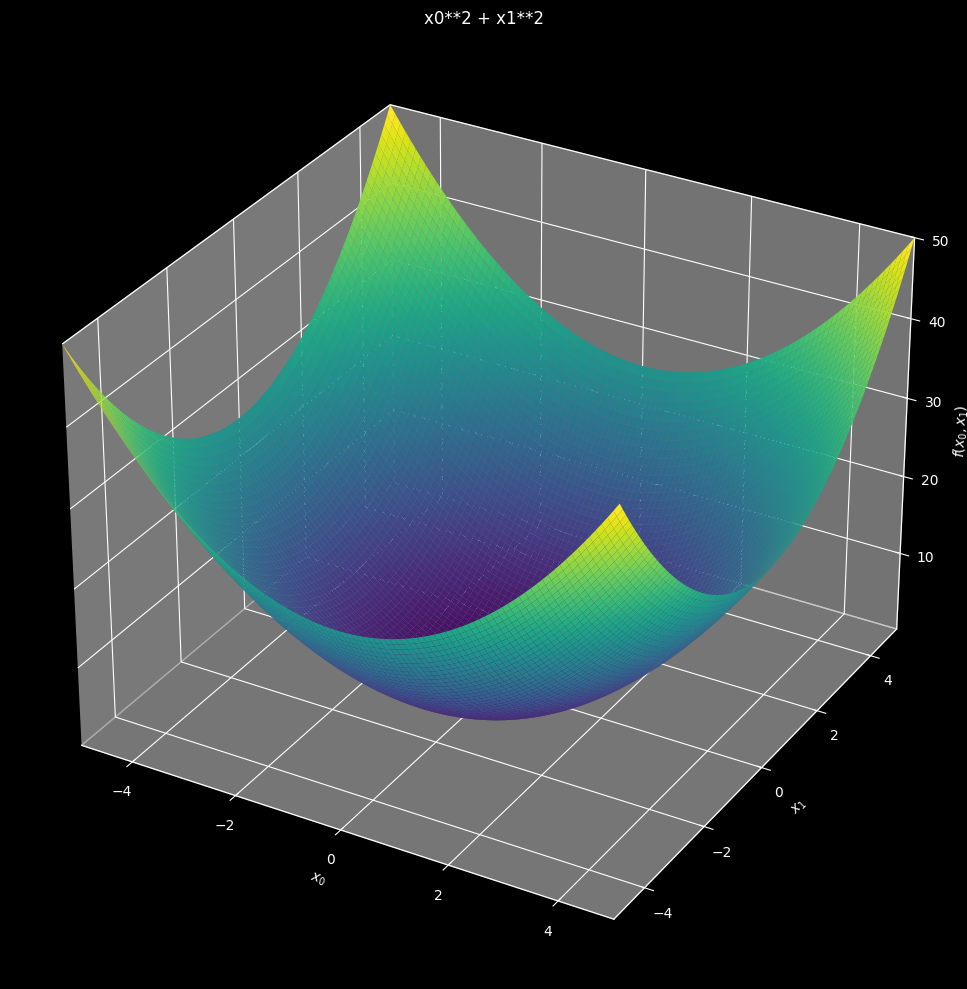

In [53]:
plot3d(
    expr,
    (x[0], -5, 5),
    (x[1], -5, 5),
    title=str(expr),
    size=(10, 10),
)

In [54]:
def ejecutar_descenso_gradiente(f, df, p0, tasa_aprendizaje=0.1, n_iter=50):
    """Ejecuta descenso del gradiente desde p0.

    Args:
        f: Función objetivo f(X) -> escalar.
        df: Gradiente df(X) -> lista/array.
        p0: Punto inicial (lista/tupla/np.array).
        tasa_aprendizaje: Step size fijo.
        n_iter: Número de iteraciones.

    Returns:
        (p_final, f(p_final), trayectoria) donde trayectoria es un array (n_iter+1, d).
    """
    p = np.asarray(p0, dtype=float)
    trayectoria = [p.copy()]

    for _ in range(n_iter):
        grad = np.asarray(df(p), dtype=float)
        p = p - tasa_aprendizaje * grad
        trayectoria.append(p.copy())

    return p, float(f(p)), np.vstack(trayectoria)


def dibujar_mapa_niveles(f, rango=5.5, resolucion=100):
    """Dibuja el mapa de niveles y devuelve (xs, ys, Z)."""
    xs = np.linspace(-rango, rango, resolucion)
    ys = np.linspace(-rango, rango, resolucion)
    X, Y = np.meshgrid(xs, ys)
    Z = f([X, Y])

    plt.contourf(xs, ys, Z, levels=resolucion)
    plt.colorbar()
    return xs, ys, Z

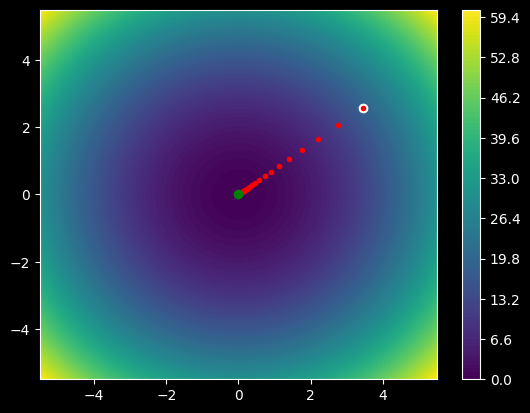

Solución: [4.915752929066394e-05, 3.681648264198899e-05] f(p)= 3.77191608009036e-09


In [70]:
rng = random.Random(0)

# Mapa de niveles
dibujar_mapa_niveles(f, rango=5.5, resolucion=100)

# Punto inicial
p0 = [rng.uniform(-5, 5), rng.uniform(-5, 5)]
plt.plot(p0[0], p0[1], "o", c="white")

# Descenso
p_final, f_final, trayectoria = ejecutar_descenso_gradiente(
    f,
    df,
    p0,
    tasa_aprendizaje=0.1,
    n_iter=50,
)

# Trayectoria (rojo) y punto final (verde)
plt.plot(trayectoria[:, 0], trayectoria[:, 1], "o", c="red", markersize=3)
plt.plot(p_final[0], p_final[1], "o", c="green")
plt.show()

print("Solución:", p_final.tolist(), "f(p)=", f_final)

**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
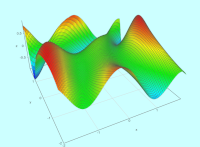


In [44]:
x = VectorSimbolico("x")

expr = sp.sin(sp.Rational(1, 2) * x[0]**2 - sp.Rational(1, 4) * x[1]**2 + 3) * sp.cos(2 * x[0] + 1 - sp.exp(x[1]))
f, df = construir_f_y_gradiente(expr)

df([1, 2])

[np.float64(-0.8803745550791662), np.float64(3.9384502467765357)]

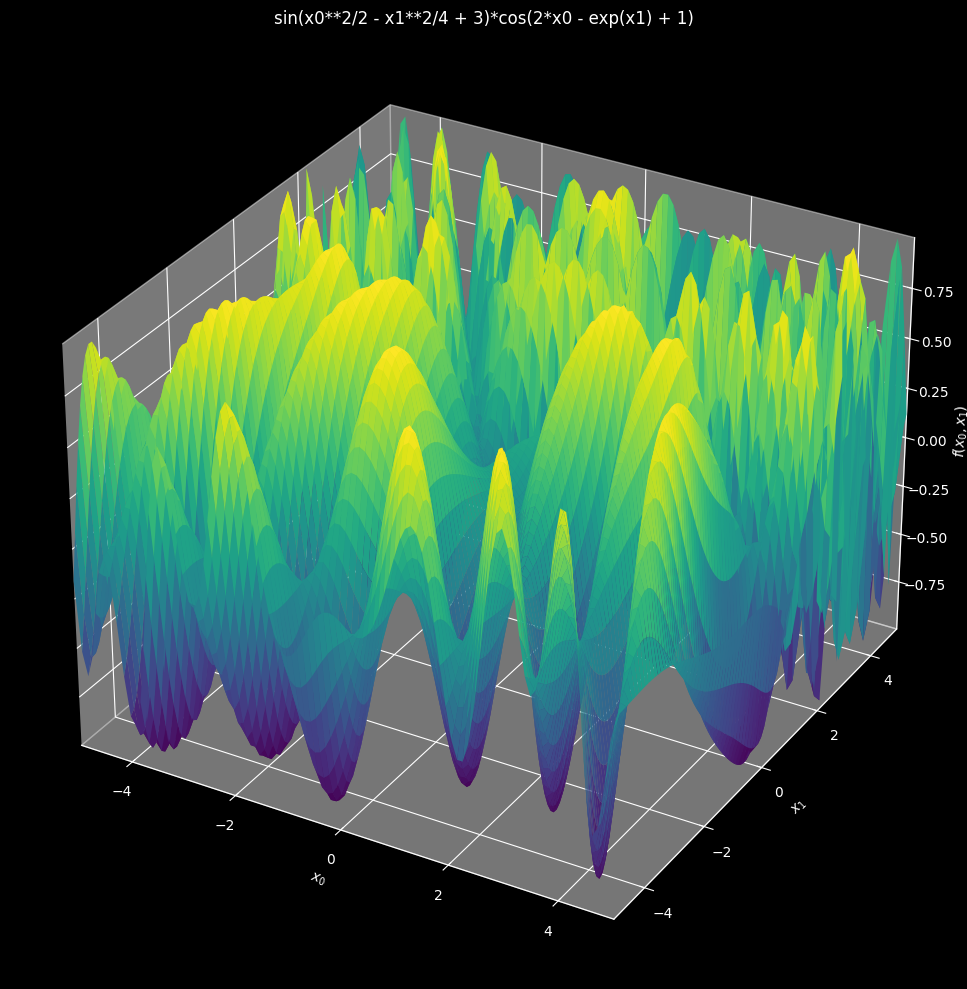

In [45]:
plot3d(
    expr,
    (x[0], -5, 5),
    (x[1], -5, 5),
    title=str(expr),
    size=(10, 10),
)

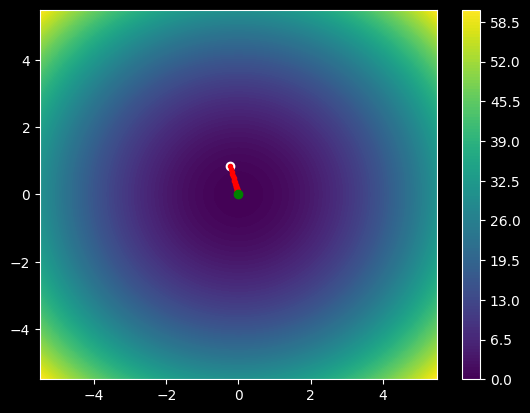

Mejor inicio: [-0.23403045847644144, 0.8338203945503118]
Mejor solución: [-5.1129687524071086e-05, 0.00018216849422976613] f(p)= 3.5799605236249486e-08


In [66]:
rng = random.Random(0)

# Mapa de niveles
dibujar_mapa_niveles(f, rango=5.5, resolucion=150)

# Multi-inicio (misma función, distintos puntos iniciales)
n_inicios = 8
tasa_aprendizaje = 0.05
n_iter = 80

mejor = None  # (f_val, p_final, trayectoria, p0)

for _ in range(n_inicios):
    p0 = [rng.uniform(-5, 5), rng.uniform(-5, 5)]
    p_final, f_final, trayectoria = ejecutar_descenso_gradiente(
        f, df, p0, tasa_aprendizaje=tasa_aprendizaje, n_iter=n_iter
    )

    if (mejor is None) or (f_final < mejor[0]):
        mejor = (f_final, p_final, trayectoria, p0)

# Dibujo solo la mejor trayectoria encontrada
f_mejor, p_mejor, tray_mejor, p0_mejor = mejor

plt.plot(p0_mejor[0], p0_mejor[1], "o", c="white")
plt.plot(tray_mejor[:, 0], tray_mejor[:, 1], "o", c="red", markersize=3)
plt.plot(p_mejor[0], p_mejor[1], "o", c="green")
plt.show()

print("Mejor inicio:", p0_mejor)
print("Mejor solución:", p_mejor.tolist(), "f(p)=", f_mejor)

Análisis para mejorar nota (Descenso del gradiente)

La función f(x,y)=sin(1/2·x^2 - 1/4·y^2 + 3)·cos(2·x + 1 - e^y) es no convexa y tiene muchos mínimos locales.

Como sin(·) y cos(·) están acotadas en [-1,1], el producto también lo está. Por tanto, f(x,y) ∈ [-1, 1] y el mínimo global teórico es -1.

Para acercarnos a ese mínimo, se usa descenso del gradiente con búsqueda de paso (line search) y se mejora el punto inicial mediante muestreo aleatorio: primero se eligen los mejores candidatos según f, y después se aplica descenso del gradiente desde esos candidatos.

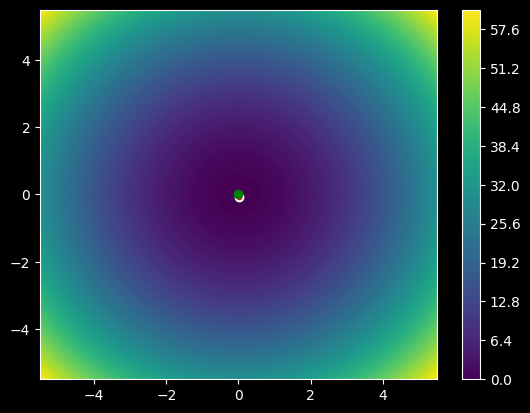

Mejor inicio (selección aleatoria): [0.019425045781841455, -0.07147205847001548] f(p0)= 0.005485587545567948
Mejor solución (line search): [0.0, 0.0] f(p)= 0.0


In [85]:
def ejecutar_descenso_gradiente_line_search(
    f, df, p0, alpha0=1.0, beta=0.5, c=1e-4, n_iter=150, tol=1e-8
):
    """Descenso del gradiente con backtracking (Armijo) para asegurar descenso."""
    p = np.asarray(p0, dtype=float)
    trayectoria = [p.copy()]

    for _ in range(n_iter):
        grad = np.asarray(df(p), dtype=float)
        norm = float(np.linalg.norm(grad))
        if norm < tol:
            break

        f_p = float(f(p))
        alpha = alpha0

        while True:
            p_new = p - alpha * grad
            f_new = float(f(p_new))

            if f_new <= f_p - c * alpha * (norm**2):
                break

            alpha *= beta
            if alpha < 1e-12:
                p_new = p
                break

        p = p_new
        trayectoria.append(p.copy())

    return p, float(f(p)), np.vstack(trayectoria)


def mejores_inicios_aleatorios(f, n_muestras=5000, rango=5.0, seed=0, k=10):
    """Devuelve k puntos iniciales con menor valor de f dentro de [-rango, rango]^2."""
    rng = np.random.default_rng(seed)
    xs = rng.uniform(-rango, rango, size=n_muestras)
    ys = rng.uniform(-rango, rango, size=n_muestras)

    vals = np.asarray(f([xs, ys]), dtype=float)
    idx = np.argpartition(vals, kth=min(k, len(vals) - 1))[:k]

    puntos = np.column_stack([xs[idx], ys[idx]])
    vals_sel = vals[idx]
    orden = np.argsort(vals_sel)

    return puntos[orden], vals_sel[orden]


# 1) Pre-búsqueda aleatoria (selección de buenos inicios)
puntos_ini, vals_ini = mejores_inicios_aleatorios(f, n_muestras=5000, rango=5.0, seed=0, k=10)

# 2) Refinamiento con descenso del gradiente (line search)
mejor = None  # (f_final, p_final, trayectoria, p0, f0)

for p0 in puntos_ini:
    f0 = float(f(p0))
    p_final, f_final, trayectoria = ejecutar_descenso_gradiente_line_search(
        f, df, p0, alpha0=1.0, n_iter=200
    )
    if (mejor is None) or (f_final < mejor[0]):
        mejor = (f_final, p_final, trayectoria, p0, f0)

f_mejor, p_mejor, tray_mejor, p0_mejor, f0_mejor = mejor

# Visualización
dibujar_mapa_niveles(f, rango=5.5, resolucion=180)
plt.plot(p0_mejor[0], p0_mejor[1], "o", c="white")
plt.plot(tray_mejor[:, 0], tray_mejor[:, 1], "o", c="red", markersize=3)
plt.plot(p_mejor[0], p_mejor[1], "o", c="green")
plt.show()

print("Mejor inicio (selección aleatoria):", p0_mejor.tolist(), "f(p0)=", f0_mejor)
print("Mejor solución (line search):", p_mejor.tolist(), "f(p)=", f_mejor)